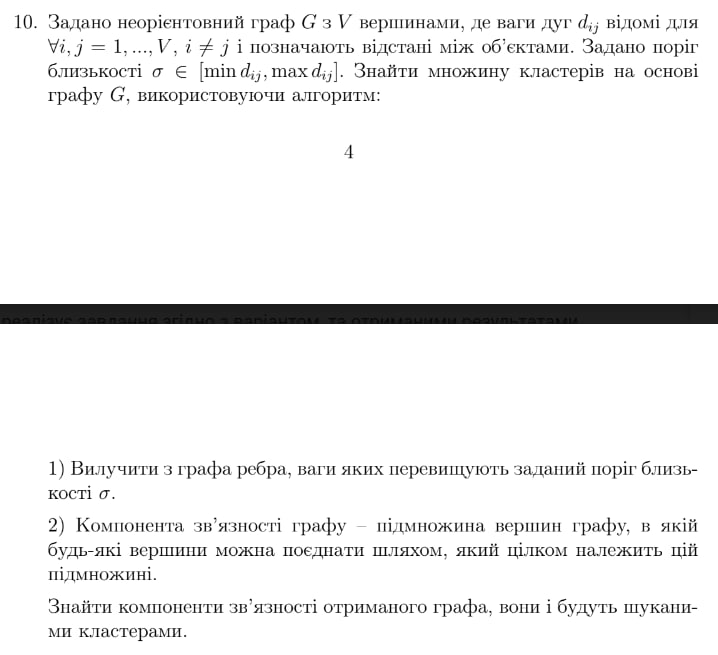

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 

In [85]:
def graph_to_image(G):
    edges = []
    V = G.shape[0]

    for i in range(V):
        for j in G[i,i:].nonzero()[0]: 
            edges.append((i, j+i))

    graph = nx.Graph()
    graph.add_edges_from(edges)

    nx.draw(graph, with_labels=True, font_weight='bold')

In [86]:
# def test(G):
#     V = G.shape[0]
#     for i in range(V):
#         for j in G[i,i:].nonzero()[0]:
#             print(j)

In [87]:
def graph_clusters(G, sigma) -> list:
    V = G.shape[0]
    
    mask_less_than_sigma = np.array(G <= sigma)
    G_masked = ((G*mask_less_than_sigma) > 0) + np.eye(V)

    G_prev = np.zeros_like(G)
    G_temp = G_masked

    while abs(G_prev - G_temp).sum() > 0:
        G_prev = G_temp
        G_temp = (np.dot(G_masked, G_prev) > 0).astype('float')

    if G_temp.sum() == V**2:
        return [G*G_masked]
    else:
        cluster_list = []
        for i in range(V):
            temp = G_temp[i]
            if temp.sum() != 0:
                G_temp = (G_temp - temp > 0).astype('float')
                cluster_list.append(G * G_masked * np.outer(temp, temp))
        return cluster_list

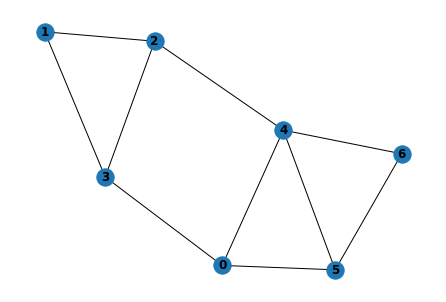

In [88]:
#test
graph = np.array([[0, 0, 0, 9, 8, 8, 0],
                  [0, 0, 1, 1, 0, 0, 0],
                  [0, 1, 0, 1, 4, 0, 0],
                  [2, 1, 1, 0, 0, 0, 0],
                  [4, 0, 4, 0, 0, 2, 1],
                  [5, 0, 0, 0, 2, 0, 2],
                  [0, 0, 0, 0, 1, 2, 0]])   

graph_to_image(graph)

clusters = graph_clusters(graph, sigma=3)

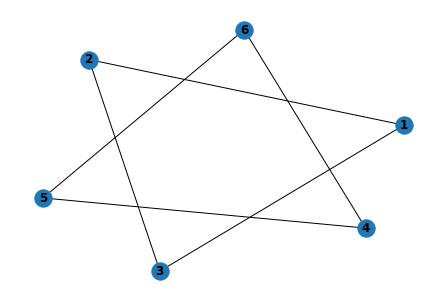

In [89]:
for cl in clusters:
    graph_to_image(cl)